Data:https://www.kaggle.com/paulbrabban/daily-minimum-temperatures-in-melbourne; Tutorial:https://www.bilibili.com/video/BV1Kt411u7fS?p=2

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# # set plot size
# plt.style.use({'figure.figsize':(25,20)})

# plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [84]:
df = pd.read_csv("DailyMinTemp_Mel.csv")
df.tail()

,Date,Daily minimum temperatures in Melbourne
3645,12/27/1990,14.0
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7
3649,12/31/1990,13.0


In [85]:
df['Date']=pd.to_datetime(df['Date'])

In [86]:
df=df.rename(columns={"Daily minimum temperatures in Melbourne": "MinTemperature"})

In [87]:
df['MinTemperature'] = pd.to_numeric(df['MinTemperature'], errors='coerce')

In [88]:
#构建新列：年，月，星期几，一个月第几天
df.loc[:,'year'] = df['Date'].apply(lambda x:x.year)

df.loc[:,'month'] = df['Date'].apply(lambda x:x.month)

df.loc[:,'dow'] = df['Date'].apply(lambda x:x.dayofweek)

df.loc[:,'dom'] = df['Date'].apply(lambda x:x.day)

In [89]:
# 构建新列：是否weekend，Saturday，Sunday
df.loc[:,'weekend'] = df['Date'].apply(lambda x:x.dayofweek>4)
df.loc[:,'weekend_sat'] = df['Date'].apply(lambda x:x.dayofweek==5)
df.loc[:,'weekend_sun'] = df['Date'].apply(lambda x:x.dayofweek==6)

In [90]:
df.head()

,Date,MinTemperature,year,month,dow,dom,weekend,weekend_sat,weekend_sun
0,1981-01-01,20.7,1981,1,3,1,False,False,False
1,1981-01-02,17.9,1981,1,4,2,False,False,False
2,1981-01-03,18.8,1981,1,5,3,True,True,False
3,1981-01-04,14.6,1981,1,6,4,True,False,True
4,1981-01-05,15.8,1981,1,0,5,False,False,False


In [91]:
# 新建列：上半月or下半月
def half_month(day):
    if day in range(1,16):
        return 1
    else:
        return 2
df.loc[:,'half_month']=df['dom'].apply(lambda x:half_month(x))

# 新建列：一个月的上中下旬
def three_part_month(day):
    if day in range(1,11):
        return 1
    if day in range(11,21):
        return 2
    else:
        return 3
df.loc[:,'three_part_month']=df['dom'].apply(lambda x:three_part_month(x))

# 新建列：每个月四个星期
def four_week_month(day):
    if day in range(1,8):
        return 1
    if day in range(8,15):
        return 2
    if day in range(15,22):
        return 3
    else:
        return 4
df.loc[:,'four_week_month']=df['dom'].apply(lambda x:four_week_month(x))

In [92]:
df.tail()

,Date,MinTemperature,year,month,dow,dom,weekend,weekend_sat,weekend_sun,half_month,three_part_month,four_week_month
3645,1990-12-27,14.0,1990,12,3,27,False,False,False,2,3,4
3646,1990-12-28,13.6,1990,12,4,28,False,False,False,2,3,4
3647,1990-12-29,13.5,1990,12,5,29,True,True,False,2,3,4
3648,1990-12-30,15.7,1990,12,6,30,True,False,True,2,3,4
3649,1990-12-31,13.0,1990,12,0,31,False,False,False,2,3,4


In [93]:
df.loc[:,'festival']=0
df.loc[(df.month==1)&(df.dom<4),'festival']=1

In [94]:
df.tail()

,Date,MinTemperature,year,month,dow,dom,weekend,weekend_sat,weekend_sun,half_month,three_part_month,four_week_month,festival
3645,1990-12-27,14.0,1990,12,3,27,False,False,False,2,3,4,0
3646,1990-12-28,13.6,1990,12,4,28,False,False,False,2,3,4,0
3647,1990-12-29,13.5,1990,12,5,29,True,True,False,2,3,4,0
3648,1990-12-30,15.7,1990,12,6,30,True,False,True,2,3,4,0
3649,1990-12-31,13.0,1990,12,0,31,False,False,False,2,3,4,0


### One-Hot-Encoding

In [95]:
df.columns

Index(['Date', 'MinTemperature', 'year', 'month', 'dow', 'dom', 'weekend',
       'weekend_sat', 'weekend_sun', 'half_month', 'three_part_month',
       'four_week_month', 'festival'],
      dtype='object')

In [96]:
before_dummy_df=df.copy()
before_dummy_df.head()

,Date,MinTemperature,year,month,dow,dom,weekend,weekend_sat,weekend_sun,half_month,three_part_month,four_week_month,festival
0,1981-01-01,20.7,1981,1,3,1,False,False,False,1,1,1,1
1,1981-01-02,17.9,1981,1,4,2,False,False,False,1,1,1,1
2,1981-01-03,18.8,1981,1,5,3,True,True,False,1,1,1,1
3,1981-01-04,14.6,1981,1,6,4,True,False,True,1,1,1,0
4,1981-01-05,15.8,1981,1,0,5,False,False,False,1,1,1,0


In [97]:
# 构造训练数据集的特征
drop_columns=['Date','MinTemperature']
X_before_dummy = before_dummy_df.drop(drop_columns,axis=1)

In [98]:
X_before_dummy.head()

,year,month,dow,dom,weekend,weekend_sat,weekend_sun,half_month,three_part_month,four_week_month,festival
0,1981,1,3,1,False,False,False,1,1,1,1
1,1981,1,4,2,False,False,False,1,1,1,1
2,1981,1,5,3,True,True,False,1,1,1,1
3,1981,1,6,4,True,False,True,1,1,1,0
4,1981,1,0,5,False,False,False,1,1,1,0


In [99]:
before_dummy_df.head()

,Date,MinTemperature,year,month,dow,dom,weekend,weekend_sat,weekend_sun,half_month,three_part_month,four_week_month,festival
0,1981-01-01,20.7,1981,1,3,1,False,False,False,1,1,1,1
1,1981-01-02,17.9,1981,1,4,2,False,False,False,1,1,1,1
2,1981-01-03,18.8,1981,1,5,3,True,True,False,1,1,1,1
3,1981-01-04,14.6,1981,1,6,4,True,False,True,1,1,1,0
4,1981-01-05,15.8,1981,1,0,5,False,False,False,1,1,1,0


In [100]:
ybefore=before_dummy_df['MinTemperature']

In [101]:
#one-hot
columns_to_encoding=['year','month','dow','dom','three_part_month','four_week_month']

In [102]:
# 使用pandas的get_dummies函数对df的指定列进行独热向量编码操作
dummy_df = pd.get_dummies(df,columns=columns_to_encoding)
dummy_df.head()

,Date,MinTemperature,weekend,weekend_sat,weekend_sun,half_month,festival,year_1981,year_1982,year_1983,...,dom_29,dom_30,dom_31,three_part_month_1,three_part_month_2,three_part_month_3,four_week_month_1,four_week_month_2,four_week_month_3,four_week_month_4
0,1981-01-01,20.7,False,False,False,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1981-01-02,17.9,False,False,False,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1981-01-03,18.8,True,True,False,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1981-01-04,14.6,True,False,True,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1981-01-05,15.8,False,False,False,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [103]:
# 构造数据集的标签
y=dummy_df['MinTemperature']

In [104]:
dummy_df.columns

Index(['Date', 'MinTemperature', 'weekend', 'weekend_sat', 'weekend_sun',
       'half_month', 'festival', 'year_1981', 'year_1982', 'year_1983',
       'year_1984', 'year_1985', 'year_1986', 'year_1987', 'year_1988',
       'year_1989', 'year_1990', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4',
       'dow_5', 'dow_6', 'dom_1', 'dom_2', 'dom_3', 'dom_4', 'dom_5', 'dom_6',
       'dom_7', 'dom_8', 'dom_9', 'dom_10', 'dom_11', 'dom_12', 'dom_13',
       'dom_14', 'dom_15', 'dom_16', 'dom_17', 'dom_18', 'dom_19', 'dom_20',
       'dom_21', 'dom_22', 'dom_23', 'dom_24', 'dom_25', 'dom_26', 'dom_27',
       'dom_28', 'dom_29', 'dom_30', 'dom_31', 'three_part_month_1',
       'three_part_month_2', 'three_part_month_3', 'four_week_month_1',
       'four_week_month_2', 'four_week_month_3', 'four_week_month_4'],
      dtype='object')

In [105]:
# 构造数据集的特征
drop_columns=['Date','MinTemperature']
X_dummy = dummy_df.drop(drop_columns,axis=1)

In [106]:
y.shape

(3650,)

In [107]:
X_dummy.shape

(3650, 72)

#### 整理training&testing datasets

In [108]:
X_before_dummy.head()

,year,month,dow,dom,weekend,weekend_sat,weekend_sun,half_month,three_part_month,four_week_month,festival
0,1981,1,3,1,False,False,False,1,1,1,1
1,1981,1,4,2,False,False,False,1,1,1,1
2,1981,1,5,3,True,True,False,1,1,1,1
3,1981,1,6,4,True,False,True,1,1,1,0
4,1981,1,0,5,False,False,False,1,1,1,0


In [109]:
ybefore.head()

0    20.7
1    17.9
2    18.8
3    14.6
4    15.8
Name: MinTemperature, dtype: float64

In [110]:
X_dummy.head()

,weekend,weekend_sat,weekend_sun,half_month,festival,year_1981,year_1982,year_1983,year_1984,year_1985,...,dom_29,dom_30,dom_31,three_part_month_1,three_part_month_2,three_part_month_3,four_week_month_1,four_week_month_2,four_week_month_3,four_week_month_4
0,False,False,False,1,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,False,False,False,1,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,True,True,False,1,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,True,False,True,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,False,False,False,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [111]:
y.head()

0    20.7
1    17.9
2    18.8
3    14.6
4    15.8
Name: MinTemperature, dtype: float64

__评估指标 Evlauation Matrix__
- MSE 均方根差
- RMSE 均方根误差
- MAE 平均绝对误差
- R^2 R Square

### Multi Linear Regression 多元线性回归

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_dummy,y,test_size=0.2,random_state=2,shuffle=True)

In [117]:
from sklearn import linear_model
lr_reg = linear_model.LinearRegression()
lr_reg.fit(X_train,y_train)
print('Intercept 截距',lr_reg.intercept_)
print('Slope 斜率（LR Model中各特征对应的系数）',lr_reg.coef_)

Intercept 截距 -87615996136084.34
Slope 斜率（LR Model中各特征对应的系数） [-6.03209678e+12 -1.52802282e+14 -2.13113514e+14  3.62729200e+13
  8.64013672e-01  3.12145248e+13  3.12145248e+13  3.12145248e+13
  3.12145248e+13  3.12145248e+13  3.12145248e+13  3.12145248e+13
  3.12145248e+13  3.12145248e+13  3.12145248e+13  1.47821997e+13
  1.47821997e+13  1.47821997e+13  1.47821997e+13  1.47821997e+13
  1.47821997e+13  1.47821997e+13  1.47821997e+13  1.47821997e+13
  1.47821997e+13  1.47821997e+13  1.47821997e+13 -4.25894722e+13
 -4.25894722e+13 -4.25894722e+13 -4.25894722e+13 -4.25894722e+13
  1.16244907e+14  1.76556138e+14  1.12555273e+13  1.12555273e+13
  1.12555273e+13  1.12555273e+13  1.12555273e+13  1.12555273e+13
  1.12555273e+13  2.05402090e+13  2.05402090e+13  2.05402090e+13
  3.70484933e+12  3.70484933e+12  3.70484933e+12  3.70484933e+12
  4.28468065e+13  6.57388651e+12  6.57388651e+12  6.57388651e+12
  6.57388651e+12  6.57388651e+12 -2.20437330e+12 -6.27528850e+12
 -6.27528850e+12 -6.27528850e+

In [118]:
lr_reg.coef_.shape

(72,)

### Temperature Scattor Plot

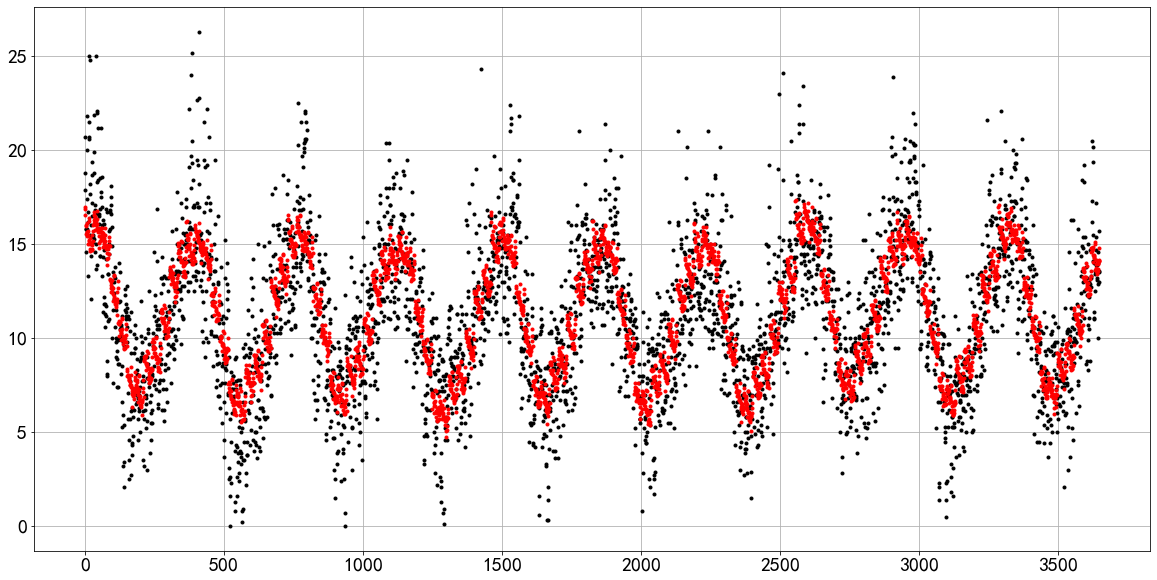

In [123]:
df['MinTemperature'].plot(style='k.',figsize=(20,10))
df.loc[:,'Linear Regression'] = lr_reg.predict(X_dummy)
plt.plot(df['Linear Regression'],'r.')

# 设置坐标文字大小
plt.tick_params(labelsize=20)

#generate grid
plt.grid()

# 超平面的二维投影 数据点断续是因为one-hot使得为0的数据不出现，为1斜率很大占主导位置
# 欠拟合

### 二次多项式回归 Quadratic polynomial regression 

In [124]:
from sklearn.preprocessing import PolynomialFeatures

# 构建一个特征处理器poly_reg, 它能将输入特征变成二次的，见下图
poly_reg = PolynomialFeatures(degree=2)

# 使用构建的二次多项式特征处理器poly_reg处理训练数据X_dummy,得到包含二次特征的训练集X_poly
X_poly = poly_reg.fit_transform(X_dummy)

In [127]:
X_poly.shape
# 72给特征两两组合的组合数2C7+72个特征每个特征的一次项+72个特征每个特征的二次项+截距b
# 2701 = 2C7+72+72+1

(3650, 2701)

In [129]:
from sklearn import linear_model
lin_reg_2= linear_model.LinearRegression() # *** 任然是LR，只不过使用二次特征进行训练
lin_reg_2.fit(X_poly,y)

# 查看回归方程系数
print("每个维度对应的系数（斜率）: Cofficients:", lin_reg_2.coef_)

# 查看回归方程截距
print("截距：intercept",lin_reg_2.intercept_)
df.loc[:,'二次多项式回归'] = lin_reg_2.predict(X_poly)

每个维度对应的系数（斜率）: Cofficients: [-8.46811012e+13 -1.90186611e+13  4.70280511e+12 ... -4.89161477e+09
  0.00000000e+00 -2.79298616e+12]
截距：intercept 84819692035457.67


In [130]:
lin_reg_2.coef_.shape

(2701,)

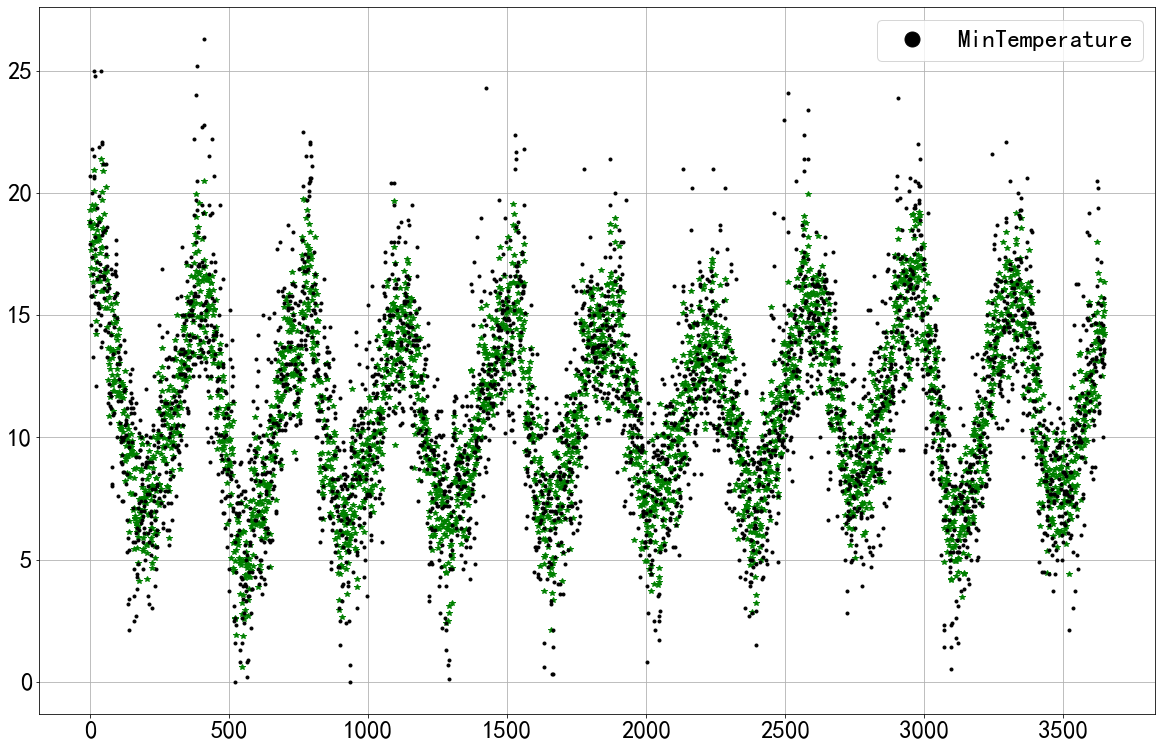

In [136]:
# 绘制二次多项式回归模型你何的气温
df.loc[:,'二次多项式回归'] = lin_reg_2.predict(X_poly)
plt.plot(df['二次多项式回归'],'g*')

# 绘制气温散点图
df['MinTemperature'].plot(style='k.',figsize=(20,13))

#设置图里文字大小和图示大小
plt.legend(fontsize=25,markerscale=5)

plt.tick_params(labelsize=25)
plt.grid()

### 构建三次多项式回归模型 Cubic polynomial regression model

In [137]:
# 构建一个特征处理器poly_reg3, 它能将输入特征变成三次的，见下图
poly_reg3 = PolynomialFeatures(degree=3)

# 使用构建的二次多项式特征处理器poly_reg3处理训练数据X_dummy,得到包含三次特征的训练集X_poly3
X_poly3 = poly_reg3.fit_transform(X_dummy)

In [138]:
from sklearn import linear_model
lin_reg_3= linear_model.LinearRegression() # *** 任然是LR，只不过使用二次特征进行训练
lin_reg_3.fit(X_poly3,y)
df.loc[:,'三次多项式回归'] = lin_reg_3.predict(poly_reg3.transform(X_dummy))

In [139]:
X_poly3.shape

(3650, 67525)

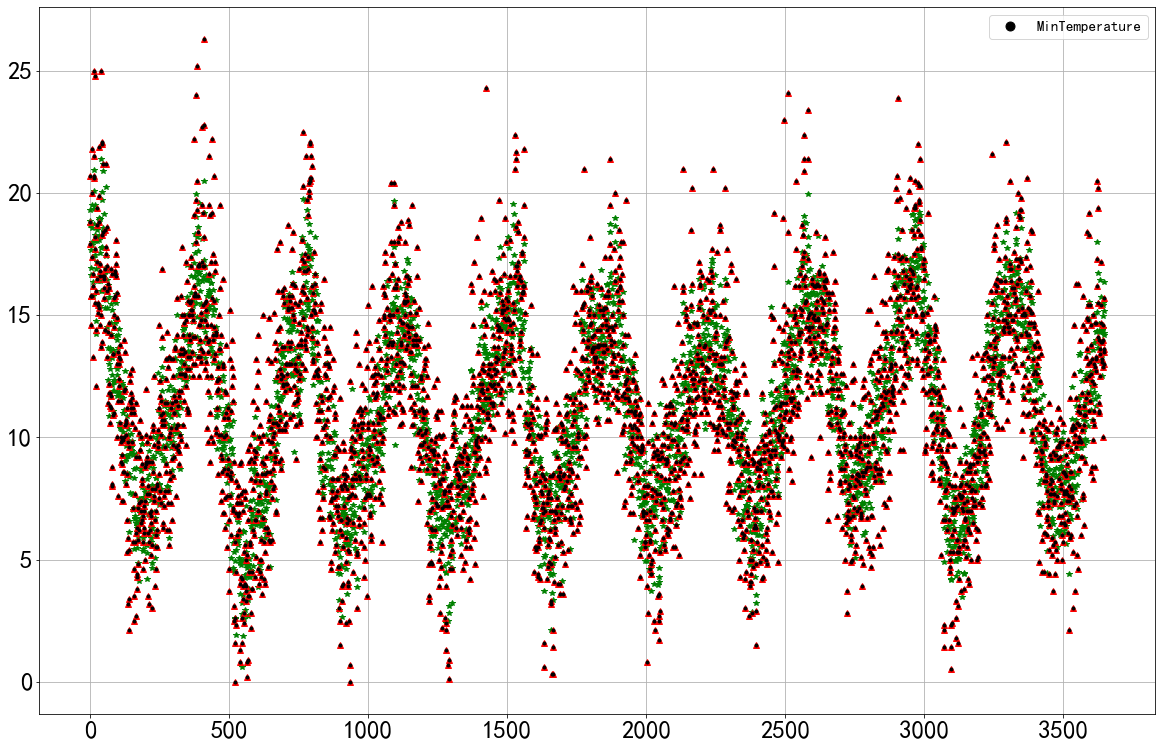

In [140]:
# 绘制二次多项式回归模型你何的气温
plt.plot(df['二次多项式回归'],'g*')
plt.plot(df['三次多项式回归'],'r^')

# 绘制气温散点图
df['MinTemperature'].plot(style='k.',figsize=(20,13))

#设置图里文字大小和图示大小
plt.legend(fontsize=15,markerscale=3)

plt.tick_params(labelsize=25)
plt.grid()

# 三次多项式出现过拟合，红色黑色几乎重合，需避免这种情况
# 想要圆滑的，大而化之的规律

### 岭回归 ridge regression
- 多项式回归，如果高次项的系数比较大，模型就容易出现过拟合。为此常见使用正则化来减弱该问题。
- 一般原理是在代价函数后面加上一个对系数的约束项，该约束叫做正则化项（regularizer）
- LR中，通常由两种不同的正则化项：
     - 加上所有系数（不包括截距）的绝对值之和，即L1范数。Lasso回归
     - 加上所有系数（不包括截距）的平方和，即L2反数。Ridge Regression
![](https://miro.medium.com/max/550/1*-LydhQEDyg-4yy5hGEj5wA.png)

In [142]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2920, 72) (730, 72) (2920,) (730,)


In [144]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=[0.2,0.5,0.8],cv=5) # alphas 越大 正则化越强
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([0.2, 0.5, 0.8]), cv=5)

In [145]:
ridge.score(X_test,y_test)

0.48863984728345666

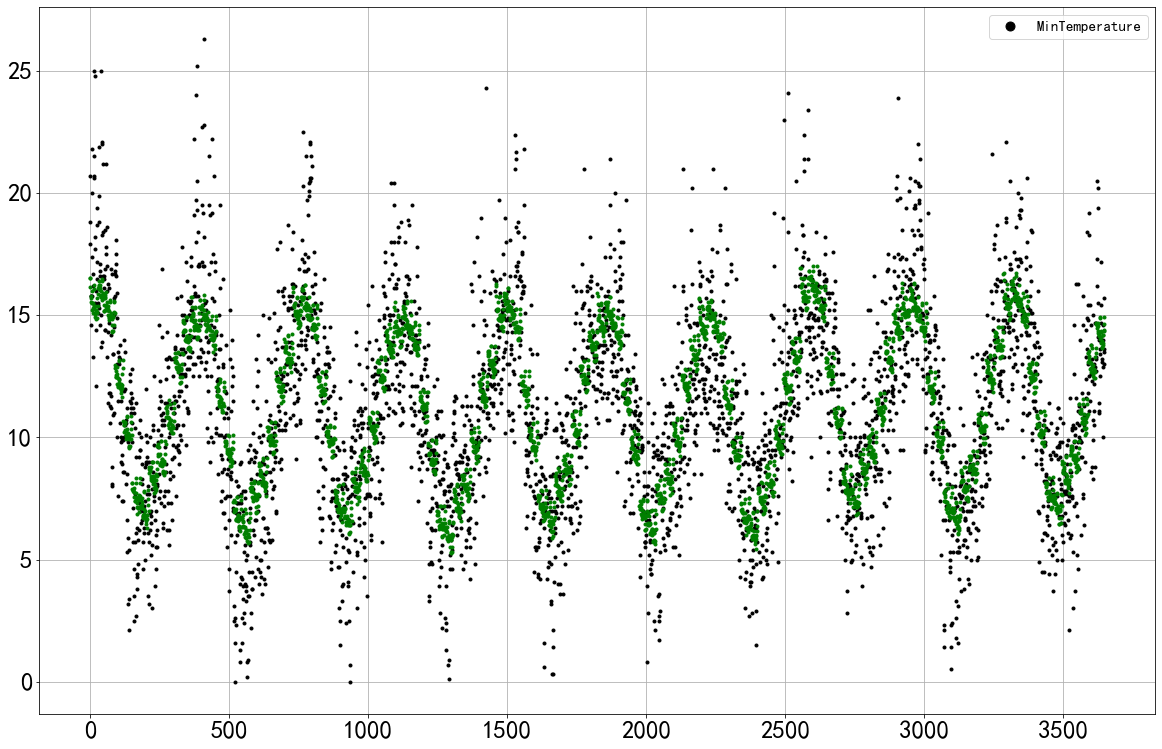

In [146]:
# 绘制气温散点图
df['MinTemperature'].plot(style='k.',figsize=(20,13))

df.loc[:,'岭回归']=ridge.predict(X_dummy)
plt.plot(df['岭回归'],'g.')

#设置图里文字大小和图示大小
plt.legend(fontsize=15,markerscale=3)

plt.tick_params(labelsize=25)
plt.grid()

# 有断续就表示有一定的欠拟合

### 决策树&随机森林 Decision Tree & Random Forest
- 不需要进行独热向量编码

In [147]:
X_before_dummy.head()

,year,month,dow,dom,weekend,weekend_sat,weekend_sun,half_month,three_part_month,four_week_month,festival
0,1981,1,3,1,False,False,False,1,1,1,1
1,1981,1,4,2,False,False,False,1,1,1,1
2,1981,1,5,3,True,True,False,1,1,1,1
3,1981,1,6,4,True,False,True,1,1,1,0
4,1981,1,0,5,False,False,False,1,1,1,0


In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_before_dummy,y,test_size=0.2,random_state=2,shuffle=True)

In [150]:
# 从python机器学习与数据挖掘工具sklearn中导入随机森林回归器
from sklearn.ensemble import RandomForestRegressor

# 导入网格搜索交叉验证，网格搜索可以让模型参数按我们给定的列表遍历，找到其中效果最好的
# 交叉验证可以重复评估回归模型的准确性
from sklearn.model_selection import GridSearchCV

# 构造参数字典，我们让这桑参数按列表中的顺序排列组合遍历一遍
param_grid={
    'n_estimators':[5,10,20,50,10,200], #决策树的个数
    'max_depth':[3,5,7],#最大树深，树太深会造成过拟合
    'max_features':[0.6,0.7,0.8,1]#决策划分时考虑的最大特征数
}

#实例化随机森林回归器
rf=RandomForestRegressor()

#以随机森林回归器为基础构造网格搜索回归器
grid=GridSearchCV(rf,param_grid=param_grid,cv=3)

#在训练集上训练
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': [0.6, 0.7, 0.8, 1],
                         'n_estimators': [5, 10, 20, 50, 10, 200]})

In [151]:
# 选取最优参数对应的模型
grid.best_params_

{'max_depth': 7, 'max_features': 0.8, 'n_estimators': 200}

In [152]:
#指定模型为效果最好参数对应的模型
rf_reg = grid.best_estimator_

In [154]:
rf_reg

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=200)

#### Visualize the decision tree

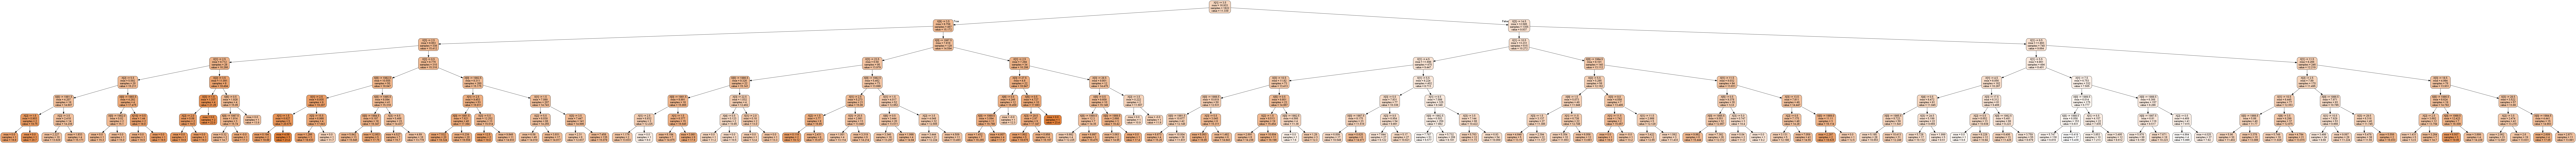

In [160]:
# 可视化决策树
from sklearn import tree
import pydotplus
from IPython.display import Image,display

# 从随机森林模型中选取以一颗决策树进行可视化
estimator = rf_reg.estimators_[8]
dot_data = tree.export_graphviz(estimator,
                               out_file=None,
                               filled=True,
                               rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

### Feature Importance Analysis

In [162]:
rf_reg.feature_importances_

array([0.06289069, 0.83420241, 0.01962769, 0.05616682, 0.00206922,
       0.00258595, 0.00178472, 0.00437245, 0.00389701, 0.00863264,
       0.00377041])

In [164]:
import numpy as np
print('Feature Importances Order:')
feature_names=['year','month','dow','dom','weekend','weekend_sat','weekend_sun',
              'half_month','three_part_month','four_week_month','festival']
feature_importances=rf_reg.feature_importances_
indices=np.argsort(feature_importances)[::-1]

for index in indices:
    print("feature %s(%f)"%(feature_names[index],feature_importances[index]))

Feature Importances Order:
feature month(0.834202)
feature year(0.062891)
feature dom(0.056167)
feature dow(0.019628)
feature four_week_month(0.008633)
feature half_month(0.004372)
feature three_part_month(0.003897)
feature festival(0.003770)
feature weekend_sat(0.002586)
feature weekend(0.002069)
feature weekend_sun(0.001785)


([<matplotlib.axis.XTick at 0x18fb15e57c8>,
 [Text(0, 0, 'month'),
  Text(1, 0, 'year'),
  Text(2, 0, 'dom'),
  Text(3, 0, 'dow'),
  Text(4, 0, 'four_week_month'),
  Text(5, 0, 'half_month'),
  Text(6, 0, 'three_part_month'),
  Text(7, 0, 'festival'),
  Text(8, 0, 'weekend_sat'),
  Text(9, 0, 'weekend'),
  Text(10, 0, 'weekend_sun')])

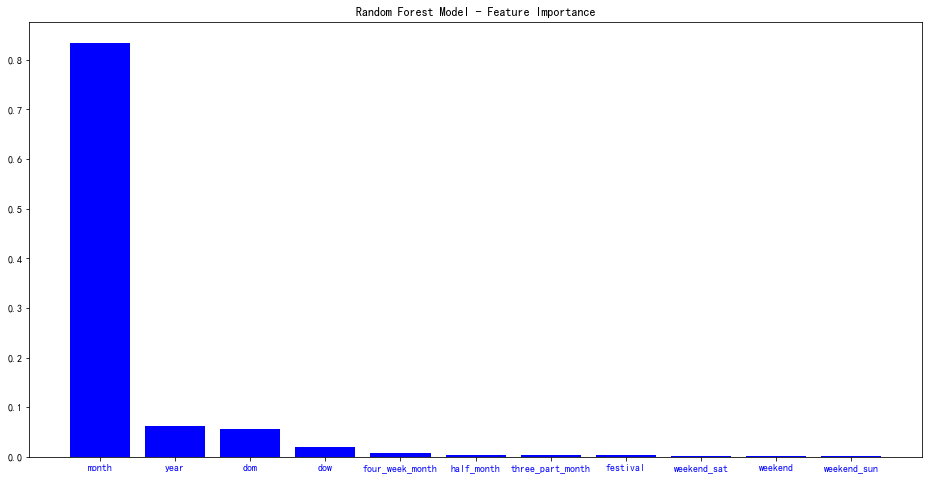

In [166]:
plt.figure(figsize=(16,8))
plt.title("Random Forest Model - Feature Importance")
plt.bar(range(len(feature_importances)),feature_importances[indices],color='b')
plt.xticks(range(len(feature_importances)),np.array(feature_names)[indices],color='b')

### 可视化回归效果

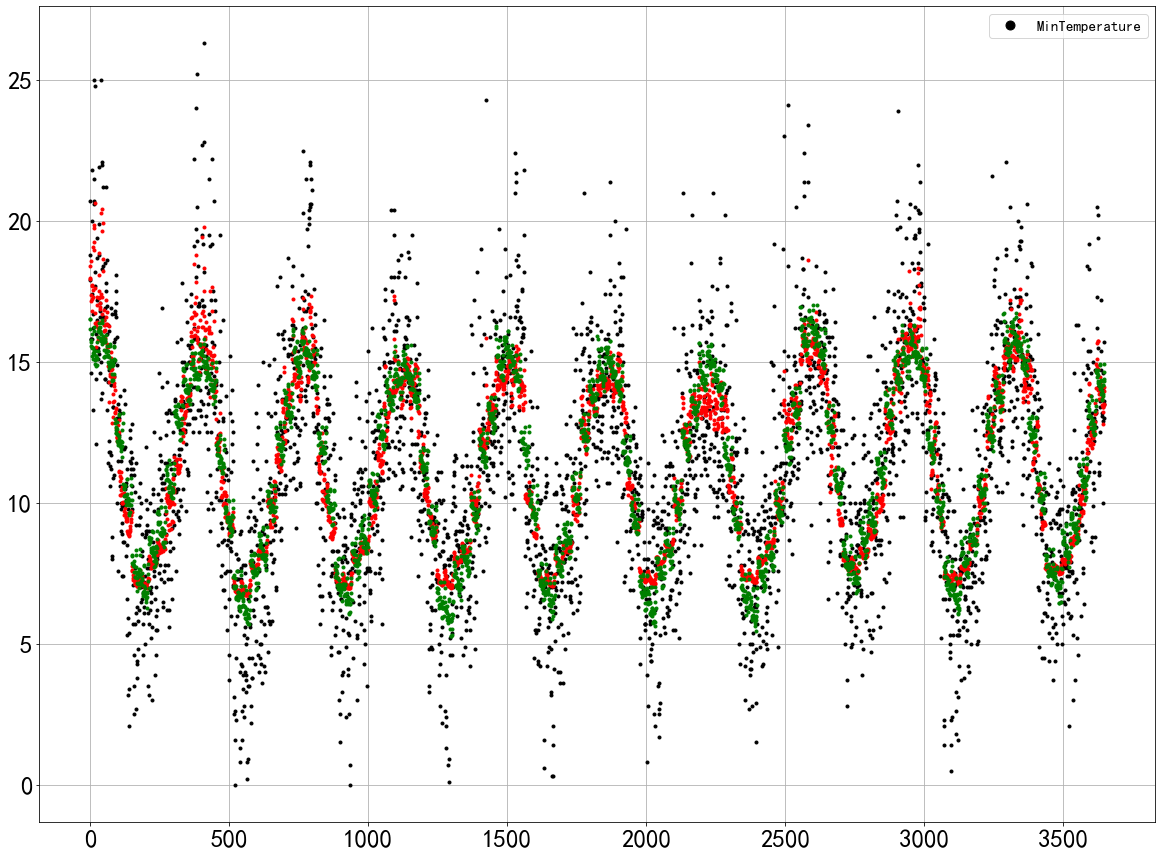

In [167]:
# 绘制气温散点图
df['MinTemperature'].plot(style='k.',figsize=(20,15))

# 绘制随机森林模型拟合的气温
df.loc[:,'随机森林']=rf_reg.predict(X_before_dummy)
plt.plot(df['随机森林'],'r.')

# 绘制岭回归模型拟合的气温
plt.plot(df['岭回归'],'g.')

#设置图里文字大小和图示大小
plt.legend(fontsize=15,markerscale=3)
plt.tick_params(labelsize=25)
plt.grid()

# 有断续就表示有一定的欠拟合

### Neural Networks

In [168]:
from sklearn import preprocessing
feature=preprocessing.scale(X_before_dummy)

In [185]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(feature,y,test_size=0.2,random_state=2,shuffle=True)

In [187]:
print(X_train.shape,y_train.shape)

(2920, 11) (2920,)


In [188]:
#from keras.models import Sequential
#from keras.layers.core import Dense,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [189]:
model=Sequential()

#第一层，32个神经元，激活函数为relu,接受11个特征作为输入
model.add(Dense(32,activation='relu',input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.2))

#第二层，64个神经元，激活函数为relu
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.2))

#回归模型的神经网络的最后一层不需要有激活函数，直接用一个神经元线性输出结果即可
model.add(Dense(1))

#将模型封装好，使用均方误差MSE作为损失函数，学习率0.001的随机梯度下降算法反向传播训练，同时用平均绝对误差MAE监控模型训练效果
model.compile(loss='mse',optimizer=SGD(lr=0.001),metrics=['mae'])

In [190]:
# 查看模型结构，第一层的384即为（11个输入特征*第一层32个神经元+32个神经元每个都有偏置项）
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [191]:
# 训练神经网络，每一批128给数据，训练50轮（即过50遍完整的训练集）
# 每一轮结束后用验证集评估模型效果
network_history = model.fit(X_train,y_train,batch_size=128,epochs=50,verbose=1,
                           validation_data=(X_val,y_val))

Epoch 1/50
23/23 [==============================] - 1s 40ms/step - loss: 106.5249 - mae: 9.4246 - val_loss: 62.4402 - val_mae: 6.9837
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 35.4710 - mae: 4.8096 - val_loss: 22.3377 - val_mae: 3.6832
Epoch 3/50
23/23 [==============================] - 0s 8ms/step - loss: 19.1590 - mae: 3.4432 - val_loss: 18.7090 - val_mae: 3.3918
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 17.2074 - mae: 3.2802 - val_loss: 16.6421 - val_mae: 3.2388
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 16.0633 - mae: 3.1780 - val_loss: 15.3624 - val_mae: 3.1293
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 15.2623 - mae: 3.0983 - val_loss: 14.5136 - val_mae: 3.0457
Epoch 7/50
23/23 [==============================] - ETA: 0s - loss: 19.6653 - mae: 3.46 - 0s 4ms/step - loss: 14.6408 - mae: 3.0302 - val_loss: 13.7857 - val_mae: 2.9671
Epoch 8/50
23/23 [==================

#### Plot MSE MAE during Training
- 有图标可知，没有出现过拟合

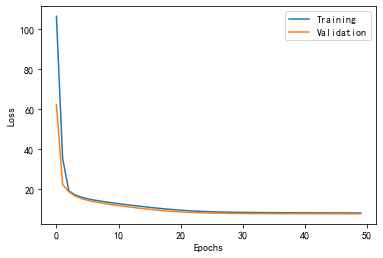

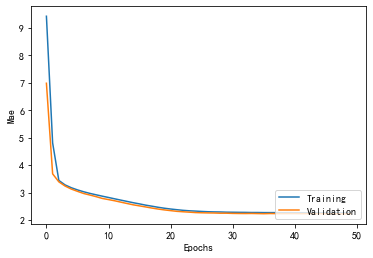

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training','Validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Mae')
    plt.plot(network_history.history['mae'])
    plt.plot(network_history.history['val_mae'])
    plt.legend(['Training','Validation'],loc='lower right')
    plt.show()
    
plot_history(network_history)

# 没有过拟合。如果有点花验证误差会先降低后变高

In [197]:
model.evaluate(X_val,y_val,batch_size=10)

73/73 [==============================] - 0s 1ms/step - loss: 7.7501 - mae: 2.2329


[7.750091552734375, 2.232874631881714]

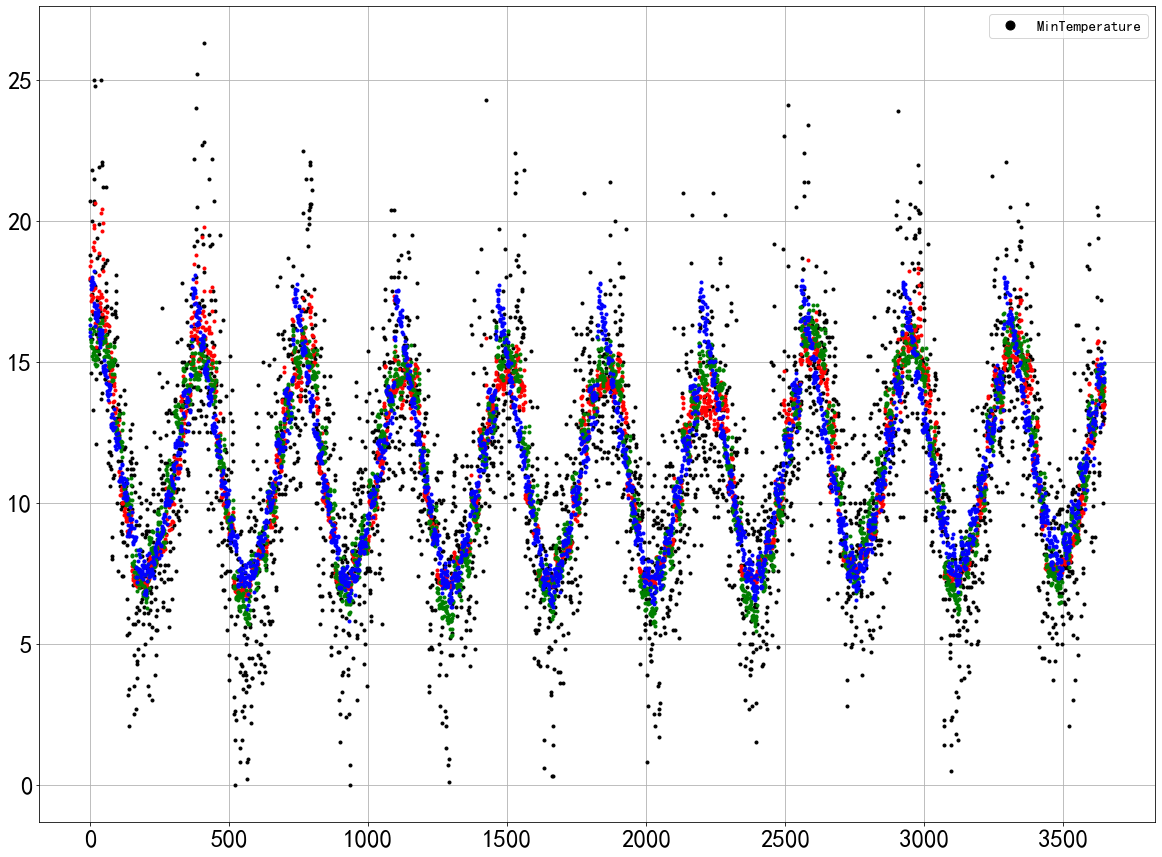

In [198]:
# 绘制气温散点图
df['MinTemperature'].plot(style='k.',figsize=(20,15))

# 绘制随机森林模型拟合的气温
plt.plot(df['随机森林'],'r.')

# 绘制岭回归模型拟合的气温
plt.plot(df['岭回归'],'g.')

#绘制多层感知机神经网络模型的回归拟合散点图
df.loc[:,'多层神经元']=model.predict(preprocessing.scale(X_before_dummy))
plt.plot(df['多层神经元'],'b.')

#设置图里文字大小和图示大小
plt.legend(fontsize=15,markerscale=3)
plt.tick_params(labelsize=25)
plt.grid()

# 神经网络效果最好。兼顾了异常点，预测结果很连续

#### Output regression file

In [199]:
df.to_csv('final_regression.csv',index=True)

#### Compare different model regression results

In [200]:
result=pd.read_csv('final_regression.csv')
result.head()

,Unnamed: 0,Date,MinTemperature,year,month,dow,dom,weekend,weekend_sat,weekend_sun,half_month,three_part_month,four_week_month,festival,Linear Regression,二次多项式回归,三次多项式回归,岭回归,随机森林,多层神经元
0,0,1981-01-01,20.7,1981,1,3,1,False,False,False,1,1,1,1,19.328125,19.328125,20.7,16.525972,18.408108,16.077908
1,1,1981-01-02,17.9,1981,1,4,2,False,False,False,1,1,1,1,18.859375,18.859375,17.9,16.534986,17.985839,16.298899
2,2,1981-01-03,18.8,1981,1,5,3,True,True,False,1,1,1,1,18.703125,18.703125,18.8,16.170013,17.945895,15.916460
3,3,1981-01-04,14.6,1981,1,6,4,True,False,True,1,1,1,0,16.640625,16.640625,14.6,15.556640,17.364366,17.604330
4,4,1981-01-05,15.8,1981,1,0,5,False,False,False,1,1,1,0,17.671875,17.671875,15.8,15.704759,18.595452,17.881798


In [241]:
result_report = result.describe().copy()

In [242]:
result_report

,Unnamed: 0,MinTemperature,year,month,dow,dom,half_month,three_part_month,four_week_month,festival,Linear Regression,二次多项式回归,三次多项式回归,岭回归,随机森林,多层神经元
count,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3.650000e+03,3650.000000,3650.000000,3650.000000
mean,1824.500000,11.177753,1985.500000,6.520548,3.001096,15.719452,1.506849,2.013699,2.619178,0.008219,11.142183,11.142183,1.117775e+01,11.188432,11.177933,11.224981
std,1053.808569,4.071837,2.872675,3.447566,2.000137,8.795673,0.500022,0.819286,1.147000,0.090299,3.576851,3.576851,4.071837e+00,3.077183,3.071059,2.959572
min,0.000000,0.000000,1981.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.609375,0.609375,1.776357e-13,5.281870,6.720785,5.814029
25%,912.250000,8.300000,1983.000000,4.000000,1.000000,8.000000,1.000000,1.000000,2.000000,0.000000,8.265625,8.265625,8.300000e+00,8.370508,8.221332,8.643139
50%,1824.500000,11.000000,1985.500000,7.000000,3.000000,16.000000,2.000000,2.000000,3.000000,0.000000,11.046875,11.046875,1.100000e+01,11.178778,10.569937,10.822310
75%,2736.750000,14.000000,1988.000000,10.000000,5.000000,23.000000,2.000000,3.000000,4.000000,0.000000,13.859375,13.859375,1.400000e+01,14.162396,13.936148,13.584051
max,3649.000000,26.300000,1990.000000,12.000000,6.000000,31.000000,2.000000,3.000000,4.000000,1.000000,21.406250,21.406250,2.630000e+01,17.022860,20.637803,18.242058


In [243]:
# 给result_analysis 新增一行MSE，稍后往里填均方误差
result_report.loc['MSE',:]=0
result_report

,Unnamed: 0,MinTemperature,year,month,dow,dom,half_month,three_part_month,four_week_month,festival,Linear Regression,二次多项式回归,三次多项式回归,岭回归,随机森林,多层神经元
count,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3.650000e+03,3650.000000,3650.000000,3650.000000
mean,1824.500000,11.177753,1985.500000,6.520548,3.001096,15.719452,1.506849,2.013699,2.619178,0.008219,11.142183,11.142183,1.117775e+01,11.188432,11.177933,11.224981
std,1053.808569,4.071837,2.872675,3.447566,2.000137,8.795673,0.500022,0.819286,1.147000,0.090299,3.576851,3.576851,4.071837e+00,3.077183,3.071059,2.959572
min,0.000000,0.000000,1981.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.609375,0.609375,1.776357e-13,5.281870,6.720785,5.814029
25%,912.250000,8.300000,1983.000000,4.000000,1.000000,8.000000,1.000000,1.000000,2.000000,0.000000,8.265625,8.265625,8.300000e+00,8.370508,8.221332,8.643139
50%,1824.500000,11.000000,1985.500000,7.000000,3.000000,16.000000,2.000000,2.000000,3.000000,0.000000,11.046875,11.046875,1.100000e+01,11.178778,10.569937,10.822310
75%,2736.750000,14.000000,1988.000000,10.000000,5.000000,23.000000,2.000000,3.000000,4.000000,0.000000,13.859375,13.859375,1.400000e+01,14.162396,13.936148,13.584051
max,3649.000000,26.300000,1990.000000,12.000000,6.000000,31.000000,2.000000,3.000000,4.000000,1.000000,21.406250,21.406250,2.630000e+01,17.022860,20.637803,18.242058
MSE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000


In [244]:
# 构建计算均方误差的函数
def MSE(yhat,y):
    error=np.array(yhat - y)
    error_power = np.power(error,2)
    MSE_error = np.sum(error_power)/len(y)
    return MSE_error

In [245]:
# 把result_analysis新构造的MSE行天上个模型的均方误差
for each in result_report.columns:
    result_report.loc['MSE',each] = MSE(result[each],result['MinTemperature'])

In [252]:
cols = [0]
result_report.drop(result_report.columns[cols],axis=1,inplace=True)

In [253]:
result_report
# 三次多项回归的MSE近乎0，说明过拟合十分严重

,MinTemperature,Linear Regression,二次多项式回归,三次多项式回归,岭回归,随机森林,多层神经元
count,3650.000000,3650.000000,3650.000000,3.650000e+03,3650.000000,3650.000000,3650.000000
mean,11.177753,11.142183,11.142183,1.117775e+01,11.188432,11.177933,11.224981
std,4.071837,3.576851,3.576851,4.071837e+00,3.077183,3.071059,2.959572
min,0.000000,0.609375,0.609375,1.776357e-13,5.281870,6.720785,5.814029
25%,8.300000,8.265625,8.265625,8.300000e+00,8.370508,8.221332,8.643139
50%,11.000000,11.046875,11.046875,1.100000e+01,11.178778,10.569937,10.822310
75%,14.000000,13.859375,13.859375,1.400000e+01,14.162396,13.936148,13.584051
max,26.300000,21.406250,21.406250,2.630000e+01,17.022860,20.637803,18.242058
MSE,0.000000,5.139571,5.139571,1.748782e-26,7.472795,5.974965,8.051752


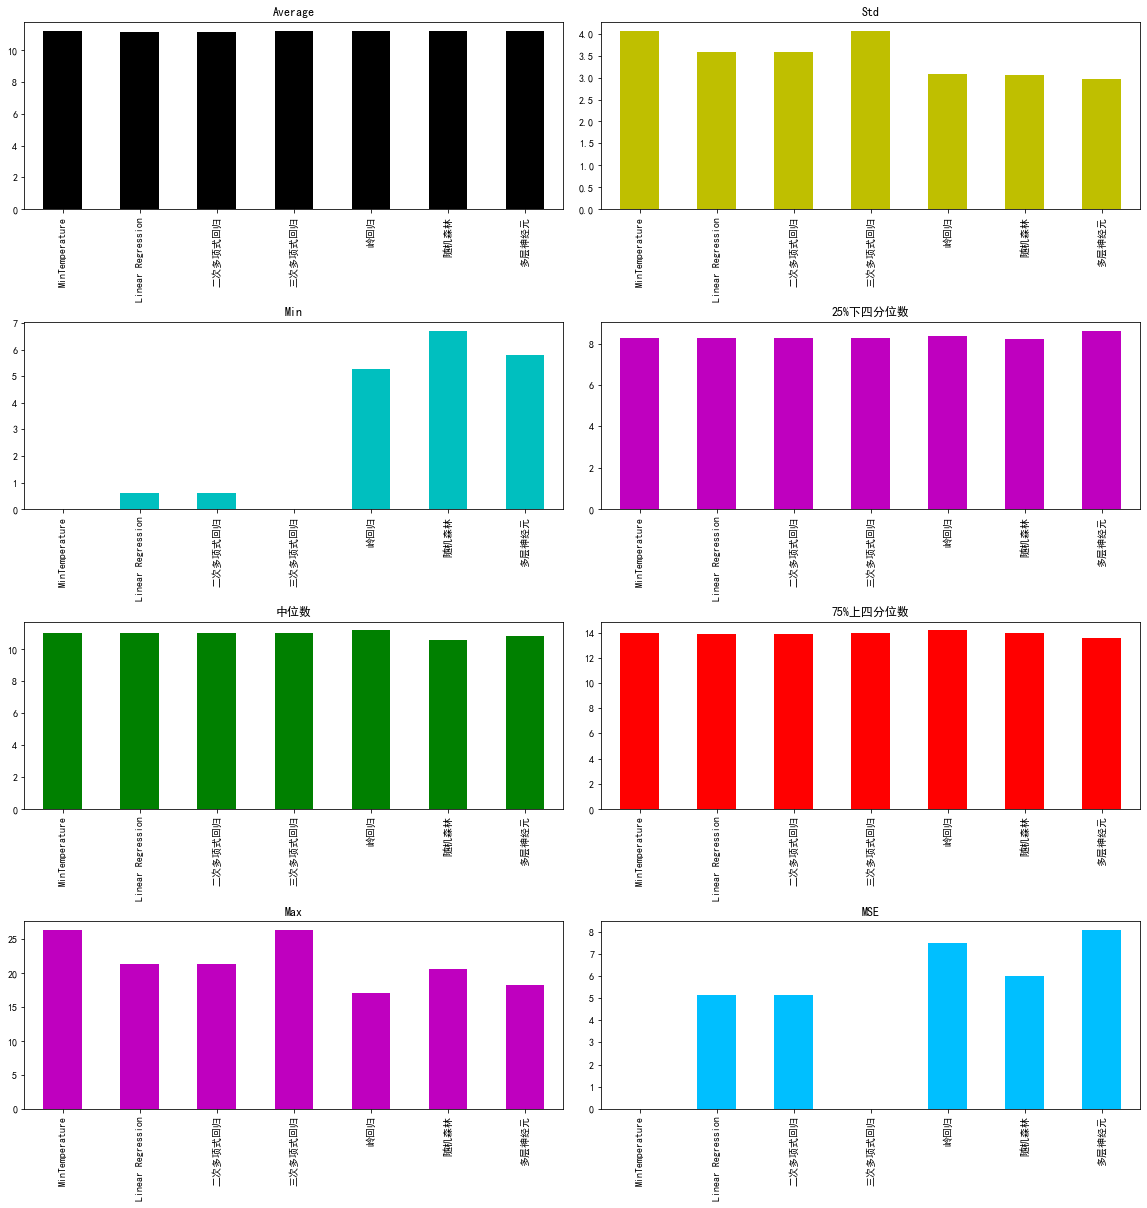

In [254]:
# 可视化这个表格
plt.figure(figsize=(20,20))
plt.subplot(421)
plt.title('Average')
result_report.loc['mean',:].plot(kind='bar',color='k')

plt.subplot(422)
plt.title('Std')
result_report.loc['std',:].plot(kind='bar',color='y')

plt.subplot(423)
plt.title('Min')
result_report.loc['min',:].plot(kind='bar',color='c')

plt.subplot(424)
plt.title('25%下四分位数')
result_report.loc['25%',:].plot(kind='bar',color='m')

plt.subplot(425)
plt.title('中位数')
result_report.loc['50%',:].plot(kind='bar',color='g')

plt.subplot(426)
plt.title('75%上四分位数')
result_report.loc['75%',:].plot(kind='bar',color='r')

plt.subplot(427)
plt.title('Max')
result_report.loc['max',:].plot(kind='bar',color='m')

plt.subplot(428)
plt.title('MSE')
result_report.loc['MSE',:].plot(kind='bar',color='deepskyblue')

plt.subplots_adjust(wspace=0.07,hspace=0.6) #调整子图间距
plt.show()